# Project Data Analysis

In [1]:
pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 26.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.4 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: 

In [2]:
# Importing the necessary libraries

import pandas as pd 
import numpy as np 
import kagglehub
import re
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


from gensim import corpora
from gensim.models import CoherenceModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import gensim
from gensim import corpora

from sklearn.decomposition import LatentDirichletAllocation
from gensim.corpora import Dictionary
from gensim import corpora
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic 

2025-09-27 09:20:36.004004: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758964836.209410      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758964836.266263      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/hdbscan/plots.py:448: DeprecationWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.11/dist-packages/hdbscan/robust_single_linkage_.py:154: DeprecationWarning: invalid escape sequence '\{'
  """Perform robust single linkage clustering from a vector array
/usr/local/lib/python3.11/dist-packages/spacy/cli/_util.py:23: DeprecationWarning: Importing 'p

In [3]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

For our analysis we are using a consumer complaint dataset which contain 3 colums and 162421 rows. This dataset contain complaints against financial instituion categorized into different appropriate terms. 

# Data Collection

In [4]:
# Define the correct path to the dataset file
file_path = '/kaggle/input/consume-complaints-dataset-fo-nlp/complaints_processed.csv'  # Replace with the actual file name

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

In [5]:
df.head()

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


In [6]:
df.shape
print("The shape of the dataset {}".format(df.shape))

The shape of the dataset (162421, 3)


In [7]:
df.describe()

,Unnamed: 0
count,162421.000000
mean,81210.000000
std,46887.048373
min,0.000000
25%,40605.000000
50%,81210.000000
75%,121815.000000
max,162420.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162421 entries, 0 to 162420
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  162421 non-null  int64 
 1   product     162421 non-null  object
 2   narrative   162411 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.7+ MB


In [9]:
# check for duplicate values 
df.duplicated().sum()
print("The number of duplicated values in our dataset {}".format(df.duplicated().sum()))

The number of duplicated values in our dataset 0


In [10]:
#Check for missing values
print(df.isnull().sum())

Unnamed: 0     0
product        0
narrative     10
dtype: int64


In [11]:
# drop the column with nulll values
df = df.dropna()
print(f'shape of the dataset{df.shape}')

shape of the dataset(162411, 3)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


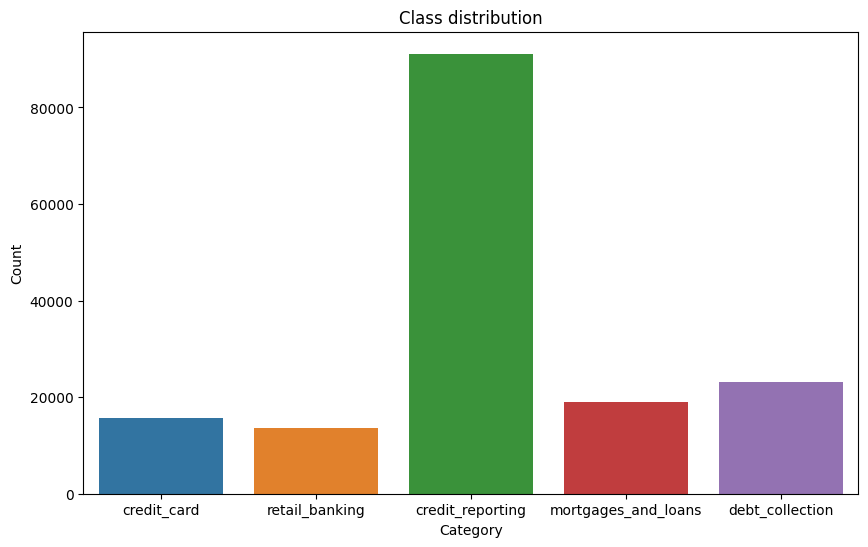

In [12]:
# Bar chart representation of the dataset.
plt.figure(figsize=(10, 6))
sns.countplot(x=df["product"])
plt.title("Class distribution")
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

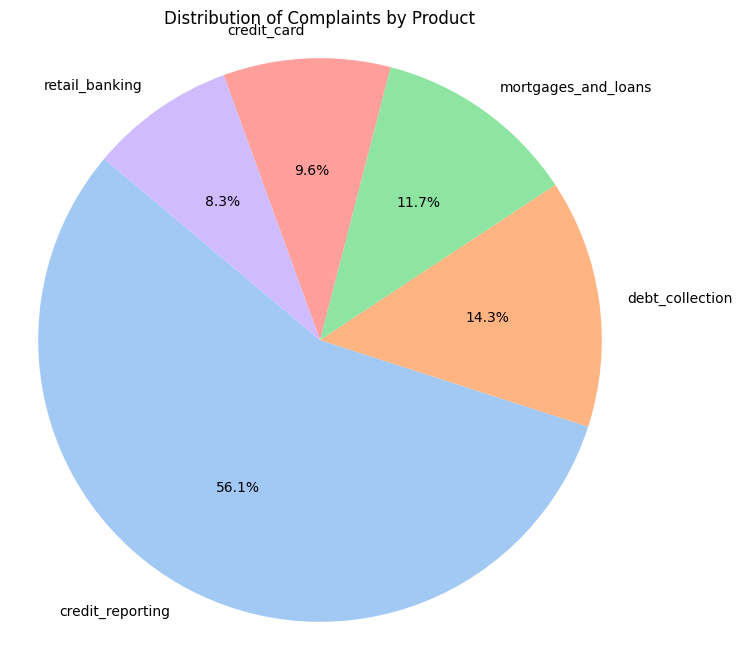

In [13]:
# Detailed pie chart representation
complaint_counts = df['product'].value_counts()

# Prepare data for pie chart
labels = complaint_counts.index
sizes = complaint_counts.values
colors = sns.color_palette("pastel")[0:len(labels)]  # Using Seaborn color palette

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.title('Distribution of Complaints by Product')
plt.show()

# Data Cleaning

In [14]:
# Create a function for data cleaning task
def clean_text(text):
    if pd.isna(text):  # Check for NaN values
        return '' 
    # Remove leading and trailing whitespaces
    text = text.strip()
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    return text    

df["narrative"].apply(clean_text)
print(df)

        Unnamed: 0           product  \
0                0       credit_card   
1                1       credit_card   
2                2    retail_banking   
3                3  credit_reporting   
4                4  credit_reporting   
...            ...               ...   
162416      162416   debt_collection   
162417      162417       credit_card   
162418      162418   debt_collection   
162419      162419       credit_card   
162420      162420  credit_reporting   

                                                narrative  
0       purchase order day shipping amount receive pro...  
1       forwarded message date tue subject please inve...  
2       forwarded message cc sent friday pdt subject f...  
3       payment history missing credit report speciali...  
4       payment history missing credit report made mis...  
...                                                   ...  
162416                                               name  
162417                                 

In [15]:
df.head(10)

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...
5,5,credit_reporting,payment history missing credit report made mis...
6,6,credit_reporting,va date complaint experian credit bureau invol...
7,7,credit_reporting,account reported abbreviated name full name se...
8,8,credit_reporting,account reported abbreviated name full name se...
9,9,credit_reporting,usdoexxxx account reported abbreviated name fu...


In [16]:
# function for stopword removal and lemmatization
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())

    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    # Lemmatization
    preprocessed_text = [WordNetLemmatizer().lemmatize(word) for word in filtered_tokens]
    
    return (preprocessed_text)


In [17]:
df.loc[:, "narrative"] = df["narrative"].apply(remove_stopwords)

In [18]:
df.head(10)

,Unnamed: 0,product,narrative
0,0,credit_card,"[purchase, order, day, shipping, amount, recei..."
1,1,credit_card,"[forwarded, message, date, tue, subject, pleas..."
2,2,retail_banking,"[forwarded, message, cc, sent, friday, pdt, su..."
3,3,credit_reporting,"[payment, history, missing, credit, report, sp..."
4,4,credit_reporting,"[payment, history, missing, credit, report, ma..."
5,5,credit_reporting,"[payment, history, missing, credit, report, ma..."
6,6,credit_reporting,"[va, date, complaint, experian, credit, bureau..."
7,7,credit_reporting,"[account, reported, abbreviated, name, full, n..."
8,8,credit_reporting,"[account, reported, abbreviated, name, full, n..."
9,9,credit_reporting,"[usdoexxxx, account, reported, abbreviated, na..."


In [19]:
new_list = []
new_list.append(df["narrative"])

In [20]:
df["narrative"] = df["narrative"].apply(" ".join)

In [21]:
text = df["narrative"].tolist()
text1 = ",".join(text)

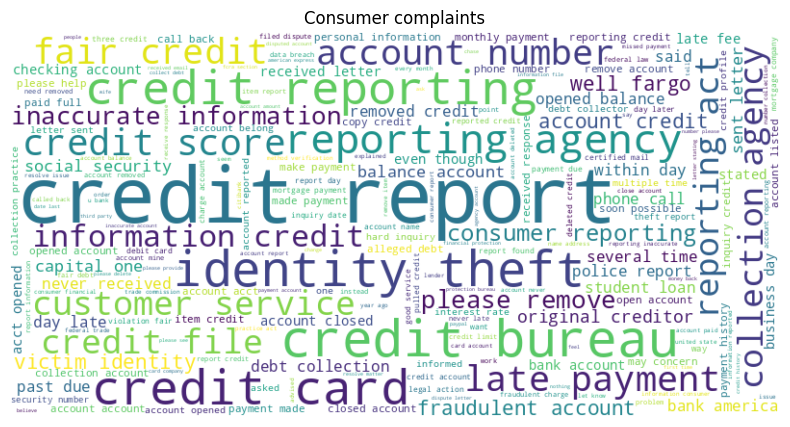

In [22]:
# word cloud representation to show how frequently a word appear in the dataset.
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text1)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("Consumer complaints")
plt.show()

# Vectorization

In [23]:
documents = [i for i in df["narrative"]]

In [24]:
# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()
# Fit the vectorizer to the data and transform it into a TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(documents)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
print(tfidf_df)

         aa  aaa  aaadvantage  aaarrrrgghhhhhh  aab  aac  aaccount  aacount  \
0       0.0  0.0          0.0              0.0  0.0  0.0       0.0      0.0   
1       0.0  0.0          0.0              0.0  0.0  0.0       0.0      0.0   
2       0.0  0.0          0.0              0.0  0.0  0.0       0.0      0.0   
3       0.0  0.0          0.0              0.0  0.0  0.0       0.0      0.0   
4       0.0  0.0          0.0              0.0  0.0  0.0       0.0      0.0   
...     ...  ...          ...              ...  ...  ...       ...      ...   
162406  0.0  0.0          0.0              0.0  0.0  0.0       0.0      0.0   
162407  0.0  0.0          0.0              0.0  0.0  0.0       0.0      0.0   
162408  0.0  0.0          0.0              0.0  0.0  0.0       0.0      0.0   
162409  0.0  0.0          0.0              0.0  0.0  0.0       0.0      0.0   
162410  0.0  0.0          0.0              0.0  0.0  0.0       0.0      0.0   

        aadvant  aadvantage  ...  zone  zoned  zoni

In [25]:
tfidf_df.head()

,aa,aaa,aaadvantage,aaarrrrgghhhhhh,aab,aac,aaccount,aacount,aadvant,aadvantage,...,zone,zoned,zoning,zoo,zoom,zoomed,zoomsup,zsaleh,zuntafi,zwicker
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
tfidf_df.shape

(162411, 45924)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


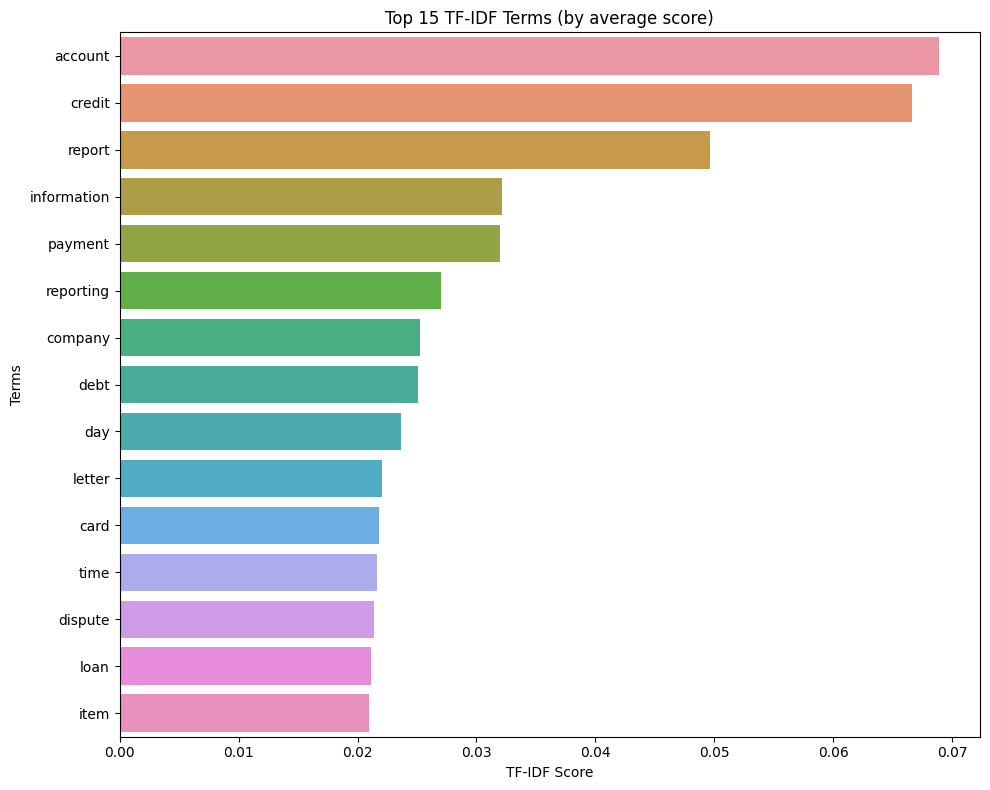

In [27]:
feature_names = vectorizer.get_feature_names_out()
tfidf_means = np.asarray(tfidf_matrix.mean(axis=0)).flatten()
top_indices = tfidf_means.argsort()[::-1][:15]
top_terms = [feature_names[i] for i in top_indices]
top_scores = tfidf_means[top_indices]

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x=top_scores, y=top_terms)
plt.title("Top 15 TF-IDF Terms (by average score)")
plt.xlabel("TF-IDF Score")
plt.ylabel("Terms")
plt.tight_layout()
plt.show()

In [28]:
# Count Vectorization
count_vectorizer = CountVectorizer(max_features=1000, min_df=2, max_df=0.8,)
count_matrix = count_vectorizer.fit_transform(documents)
count_df = pd.DataFrame(count_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())
print(count_df)

        ability  able  absolutely  accept  accepted  access  accordance  \
0             0     0           0       0         0       0           1   
1             0     0           0       0         0       0           0   
2             0     0           0       0         0       0           0   
3             0     2           0       0         0       0           0   
4             0     2           0       0         0       0           0   
...         ...   ...         ...     ...       ...     ...         ...   
162406        0     0           0       0         0       0           0   
162407        0     0           0       0         0       0           0   
162408        0     0           0       0         0       0           0   
162409        0     0           0       0         0       0           0   
162410        0     0           0       0         0       0           0   

        according  account  acct  ...  worked  working  would  writing  \
0               0        

In [29]:
count_df.head()

,ability,able,absolutely,accept,accepted,access,accordance,according,account,acct,...,worked,working,would,writing,written,wrong,wrote,xxxxxxxx,year,yet
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,3,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,4,0,...,0,0,1,0,0,1,0,0,1,0
3,0,2,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
count_df.shape

(162411, 1000)

In [31]:
word_counts = count_df.sum(axis=0)

# Create a DataFrame for visualization
word_counts_df = pd.DataFrame(word_counts, columns=['count']).reset_index()
word_counts_df.columns = ['word', 'count']

# Sort the DataFrame by count in descending order
word_counts_df = word_counts_df.sort_values(by='count', ascending=False)

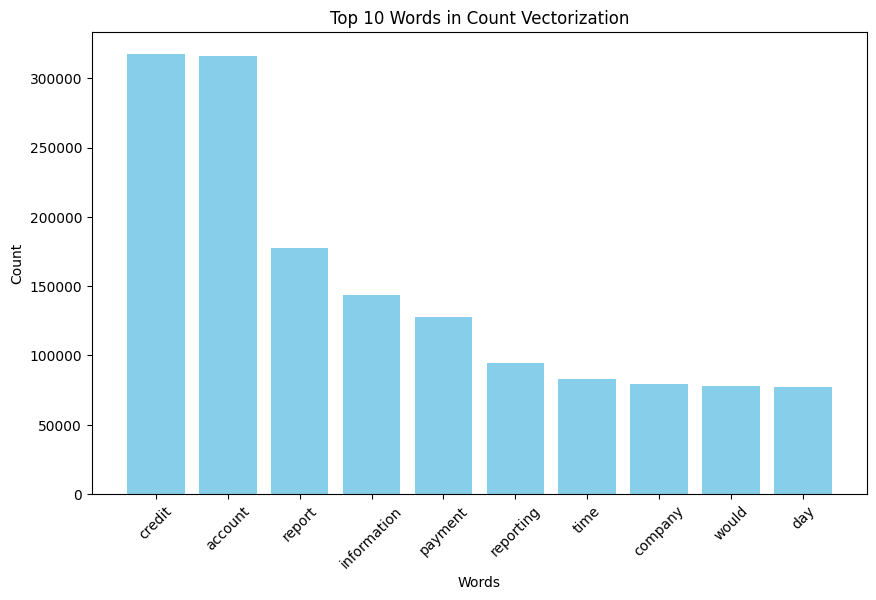

In [32]:
plt.figure(figsize=(10, 6))
plt.bar(word_counts_df['word'][:10], word_counts_df['count'][:10], color='skyblue')
plt.title('Top 10 Words in Count Vectorization')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Topic Modelling

# LDA

In [33]:
# Define the LDA model
lda = LatentDirichletAllocation(n_components=10, random_state=42)

# Fit the model to the data
lda.fit(tfidf_matrix)

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Print the top words for each topic
n_top_words = 10
for topic_idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    print(f"Topic {topic_idx}: {' '.join(top_words)}")

Topic 0: debt credit collection account letter reporting information report company proof
Topic 1: acct inquiry charge account opened credit balance act fraudulent hard
Topic 2: card account bank call credit charge called number phone told
Topic 3: inquiry credit report information account reporting file address unauthorized agency
Topic 4: day account item pnc deleted breach credit report immediately data
Topic 5: credit account report reporting information late bureau payment balance experian
Topic 6: payment loan bank account mortgage would told time credit month
Topic 7: account report credit identity theft item please remove fraudulent mine
Topic 8: dispute day regard credit investigation filed result bureau response report
Topic 9: theft victim identity notarized affidavit ftc sworn notified id along


In [34]:
tokenized_docs = [doc.split() for doc in df['narrative']]
dictionary = Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(text) for text in tokenized_docs]

In [35]:
# Convert LDA topics to format expected by CoherenceModel
lda_topics_formatted = [[feature_names[word_idx] for word_idx in topic.argsort()[:-11:-1]] for topic in lda.components_]

# Calculate coherence score for LDA
lda_coherence_model = CoherenceModel(topics=lda_topics_formatted, texts=tokenized_docs, dictionary=dictionary, coherence='c_v')
lda_coherence_score = lda_coherence_model.get_coherence()
print(f"LDA Coherence Score: {lda_coherence_score}")

LDA Coherence Score: 0.5107388673222005


# Bertopic 


In [36]:
# Initialize BERTopic
topic_model = BERTopic()

document = df['narrative'].astype(str).tolist()

# Fit the model using the vectorized data
# You can choose either count_vectors or tfidf_vectors
topics, probabilities = topic_model.fit_transform(documents, count_matrix)

# Display topics
print(topic_model.get_topic_info())

      Topic  Count                                           Name  \
0        -1  77074                -1_payment_mortgage_called_told   
1         0   1922                  0_calling_call_stop_voicemail   
2         1   1563                     1_pnc_link_connect_linking   
3         2   1321                 2_america_bank_branch_suntrust   
4         3   1215                      3_fargo_well_wf_executive   
...     ...    ...                                            ...   
2315   2314     10  2314_plaintiff_requisite_compliant_compliance   
2316   2315     10       2315_restoration_access_manage_incognito   
2317   2316     10            2316_lived_syncing_virginia_warrent   
2318   2317     10  2317_collectech_diversified_litigate_advising   
2319   2318     10               2318_greensky_zuntafi_laser_hair   

                                         Representation  \
0     [payment, mortgage, called, told, loan, would,...   
1     [calling, call, stop, voicemail, caller, cell,.

In [37]:
freq_bert = topic_model.get_topic_info()
freq_bert

,Topic,Count,Name,Representation,Representative_Docs
0,-1,77074,-1_payment_mortgage_called_told,"[payment, mortgage, called, told, loan, would,...",[shocked reviewed credit report week found mul...
1,0,1922,0_calling_call_stop_voicemail,"[calling, call, stop, voicemail, caller, cell,...",[called left message wife general private voic...
2,1,1563,1_pnc_link_connect_linking,"[pnc, link, connect, linking, apps, allow, app...","[trying link account pnc, link pnc account, wa..."
3,2,1321,2_america_bank_branch_suntrust,"[america, bank, branch, suntrust, prosperity, ...",[believe someone stolen identity opened checki...
4,3,1215,3_fargo_well_wf_executive,"[fargo, well, wf, executive, pmi, mediation, f...",[submitted dispute showing well fargo credit c...
...,...,...,...,...,...
2315,2314,10,2314_plaintiff_requisite_compliant_compliance,"[plaintiff, requisite, compliant, compliance, ...",[account added created unbeknownst notice conc...
2316,2315,10,2315_restoration_access_manage_incognito,"[restoration, access, manage, incognito, bode,...",[full access account online denied request res...
2317,2316,10,2316_lived_syncing_virginia_warrent,"[lived, syncing, virginia, warrent, reportxxxx...","[account lived address, account lived address,..."
2318,2317,10,2317_collectech_diversified_litigate_advising,"[collectech, diversified, litigate, advising, ...",[company responded last cfpb complaint advisin...


In [38]:
freq_bert.shape

(2320, 5)

In [39]:
topic_model.get_topic(0)

[('calling', 0.006781757858149449),
 ('call', 0.004220162887898224),
 ('stop', 0.0038488473013653483),
 ('voicemail', 0.0036335032497502385),
 ('caller', 0.0034691724095443693),
 ('cell', 0.00340196068651238),
 ('harassing', 0.0032551091481669283),
 ('message', 0.0029719379843269394),
 ('phone', 0.002960982647947028),
 ('number', 0.002654911498013769)]

In [40]:
freq_bert['Representative_Docs'][5]

['deposited checking account number bank america opened name check number amount dollar dated check deposited one time fund check posted one time account amount dollar pulled account stating check double deposited false statement',
 'friday deposited check bank america teller national company checking account hour later bank sent email stated holding fund asked bank release hold stating unable verify fund called bank bank wrote check verified fund check cleared said reason bank america hold fund therefore proof bank america never even tried help wrong unfair many reason main reason bank america accepted deposit mention hold bank america would told would hold could cancelled deposit cashed check bank check written clarify bank america took deposit tell hold hour later get email check hold exec office said keep hold wrong many way hope assist people wrong causing severe financial hardship executive management ca possibly realize bad hurting customer know hope fix customer given option ho